<a href="https://colab.research.google.com/github/pareshrchaudhary/numericalmethods/blob/main/DerivativesApplications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applications of Derivatives

#### Setup

In [1]:
!git clone https://github.com/pareshrchaudhary/numericalmethods.git

fatal: destination path 'numericalmethods' already exists and is not an empty directory.


In [6]:
import sys
sys.path.append("/content/numericalmethods")
import numpy as np
import matplotlib.pyplot as plt
import math
from numericalmethods.derivatives import Derivative, Element

## 1) Approximation

### 1.1) Linear Approximation

Let's approximate squareroot of a $16.3$-


If we were to guess the square root, then it would be pretty close to $4$.   
How do we do it? We check the closest perfect sqare root value and make an estimate.   
$\sqrt{16.3} ≈ 4$


To estimate $\sqrt{16.3}$ let's draw a tangent line at $\sqrt{16}$ and use the equation of the tangent line to approximate our desired value.

In [8]:
def f(x):
  return math.sqrt(x)

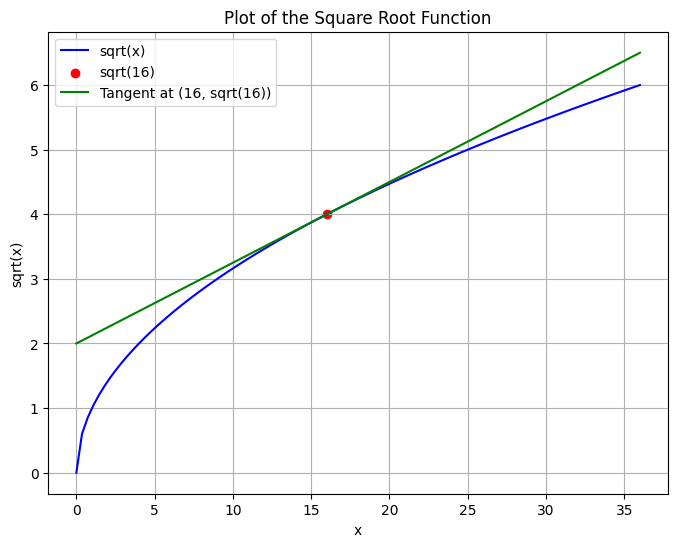

In [11]:
x = np.linspace(0, 36, 100)
y = np.sqrt(x)

x_point = 16
y_point = np.sqrt(x_point)
slope = 0.5 / np.sqrt(x_point)
tangent_y = slope * (x - x_point) + y_point

plt.figure(figsize=(8, 6))
plt.plot(x, y, label='sqrt(x)', color='blue')
plt.scatter([16], [4], color='red', label='sqrt(16)')
plt.plot(x, tangent_y, color='green', label='Tangent at (16, sqrt(16))')

plt.xlabel('x')
plt.ylabel('sqrt(x)')
plt.title('Plot of the Square Root Function')
plt.grid(True)
plt.legend()
plt.show()

Equation of the tangent line is given by $y-y_1 = m(x-x_1)$ where $m$ is slope of the line.

Plugging it the information we have - $y-4 = m(x-16)$.  

What do we do about slope $m$? We take derivative of $f(x)$ at $x=16$.

In [12]:
dx = Derivative(f)
m = dx.differentiate(16)

In [13]:
y = m * (16.3 - 16) + 4
print(y)

4.0375


$\sqrt(16) = 4.0375$

To linearly approximate a function $f(x)$ at a point $x_{new}$ near $x_{old}$ we have  
$\boxed{f(x_{new}) = f'(x_{old}) * (x_{new} - x_{old}) + f(x_{old})}$

_Note: This approximation works only when both the values are closer._

Also used as estimation error calculation:  
$\boxed{f(x_2) - f(x_1) = f'(x_1) * (x_2 - x_1)}$  
$\boxed{Δy = f'(x_{old})*Δx}$

### 1.2) Quadratic Approximation

Linear ⇒ Tangent   
Quadratic ⇒ Parabola

While linear approximation only tells you about the value of the function at a point, quadratic approximation also tells you about the curvature of the function at that point.

The **quadratic approximation** near $x=a$  is the **best fit parabola** to $f(x)$ at the point $x=a$.

The formula for the quadratic approximation of a function $f(x)$ near a point  $x=a$ is  
$\boxed{f(x) ≈ f(a) + f'(a) \cdot (x-a) + \frac{f"(a)}{2} \cdot (x-a)^2}$

In [20]:
def fcos(x):
  return np.cos(x)

In [35]:
cosddx = Derivative(fcos)
cosddx.differentiate(0)

-0.0

In [36]:
cosd2dx2 = Derivative(cosddx.differentiate, epsilon=1e-3)
cosd2dx2.differentiate(0)

-1.0

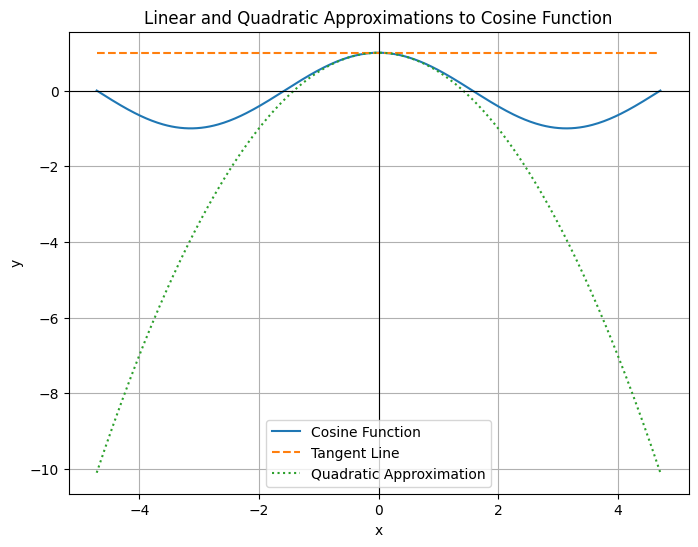

In [41]:
# Number line
x_val = np.linspace(-3/2 * np.pi, 3/2 * np.pi, 400)

# Cos function
y_cos = [fcos(x) for x in x_val]

# Tangent Line: Linear Approximation
x_tangent = 0
y_tangent = fcos(x_tangent)
slope = cosddx.differentiate(x_tangent)
y_tangent_line = [slope * x + y_tangent for x in x_val]

# Parabola: Quadratic Approximation
x_parabola = 0
first_dydx = cosddx.differentiate(x_parabola)
second_dydx = cosd2dx2.differentiate(x_parabola)
y_parabola = fcos(x_parabola)
quad_approx_vals = [y_parabola + first_dydx * (x - x_parabola) +
                    (second_dydx / 2) * (x - x_parabola)**2 for x in x_val]

plt.figure(figsize=(8, 6))
plt.plot(x_val, y_cos, label='Cosine Function')
plt.plot(x_val, y_tangent_line, label='Tangent Line', linestyle='--')
plt.plot(x_val, quad_approx_vals, label='Quadratic Approximation', linestyle=':')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear and Quadratic Approximations to Cosine Function')
plt.legend()
plt.grid()
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.show()

**_Note: Quadratic Approximation is also called as Taylor Approximation in second degree._**

### 1.3) Newton's Method

## 2) Graphing and critical points: 1st and 2nd derivative tests

## 3) Optimization: max min problems